##### Getting data - only on colab

In [25]:
!unzip -q  /content/sample_data/fashion-mnist_train.csv.zip -d ./

replace ./fashion-mnist_train.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: 

#### Importing modules

In [1]:
# installing minisom module
!pip install minisom

In [2]:
from minisom import MiniSom

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn import datasets
from sklearn.preprocessing import scale

### The Datasets
For this algorithm I used 2 datasets to see how well it will perform on them. The first one is a
version of MNIST dataset provided by sklearn which includes 1797 digits over 10 classes where
each image is represented by 64 numbers(pixels). The second dataset is FashioMNIST which
includes 60000 fashion items each represented as 28x28 pixels or 784 numbers.

# MNIST 

In [124]:
# getting the dataset using sklearn
digits = datasets.load_digits(n_class=10)
data = digits.data
num = digits.target
data.shape, num.shape

((1797, 64), (1797,))

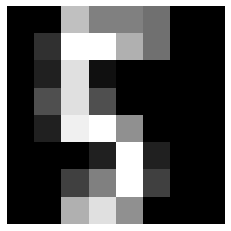

In [125]:
plt.imshow(data[25].reshape(8, 8), cmap='gray')
plt.axis('off')
plt.show()

### SOM on MNIST with `triangle` neighborhood function

In [127]:
# SOM with 30x30 map
som = MiniSom(30, 30, 64, sigma=4, learning_rate=0.5, neighborhood_function='triangle')
som.pca_weights_init(data)
som.train(data, 5000, random_order=True, verbose=True)

 [  470 / 5000 ]   9% - 0:00:01 left 

 [ 1030 / 5000 ]  21% - 0:00:01 left 

 [ 1626 / 5000 ]  33% - 0:00:01 left 

 [ 2209 / 5000 ]  44% - 0:00:01 left 

 [ 2801 / 5000 ]  56% - 0:00:00 left 

 [ 3148 / 5000 ]  63% - 0:00:00 left 

 [ 3570 / 5000 ]  71% - 0:00:00 left 

 [ 4027 / 5000 ]  81% - 0:00:00 left 

 [ 4482 / 5000 ]  90% - 0:00:00 left 

 [ 4915 / 5000 ]  98% - 0:00:00 left 

 [ 5000 / 5000 ] 100% - 0:00:00 left 
 quantization error: 13.468960287561494


**I used SOM to map the MNIST data into a 30x30 map with the neighborhood function set as a
`triangle`. This resulted in a quantization error of `13.46`.**

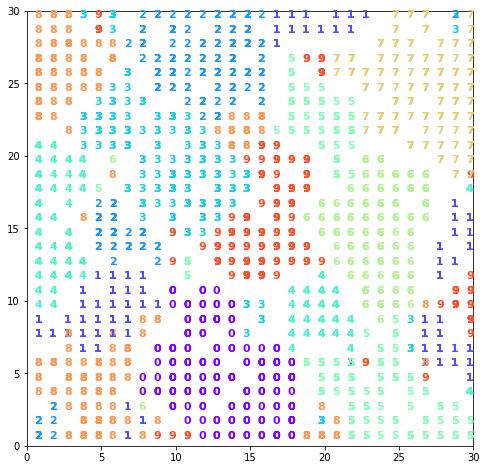

In [128]:
plt.figure(figsize=(8, 8))
wmap = {}
im = 0
for x, t in zip(data, num):
    w = som.winner(x)
    wmap[w] = im
    plt.text(w[0]+0.5, w[1]+0.5, str(t),
            color=plt.cm.rainbow(t/10.), fontdict={'weight': 'bold',
                                                  'size':11})
    im = im + 1
    
plt.axis([0, som.get_weights().shape[0], 0, som.get_weights().shape[1]])
plt.savefig('som_digits.png')
plt.show()

In [129]:
som.get_weights().shape

(30, 30, 64)

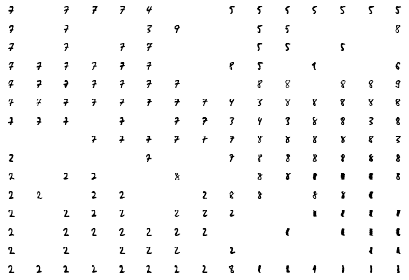

In [135]:
cnt = 0
for j in reversed(range(15)):  # images mosaic
    for i in range(15):
        plt.subplot(15, 15, cnt+1, frameon=False,  xticks=[],  yticks=[])
        if (i, j) in wmap:
            plt.imshow(digits.images[wmap[(i, j)]],
                       cmap='Greys', interpolation='nearest')
        else:
            plt.imshow(np.zeros((8, 8)),  cmap='Greys')
        cnt = cnt + 1

plt.tight_layout()
plt.savefig('som_digts_imgs.png')
plt.show()

### SOM on MNIST with `gaussian` neighborhood function

In [131]:
# SOM with 30x30 map
som = MiniSom(30, 30, 64, sigma=4, learning_rate=0.5)
som.pca_weights_init(data)
som.train(data, 5000, random_order=True, verbose=True)

 [  354 / 5000 ]   7% - 0:00:02 left 

 [  758 / 5000 ]  15% - 0:00:02 left 

 [ 1253 / 5000 ]  25% - 0:00:01 left 

 [ 1772 / 5000 ]  35% - 0:00:01 left 

 [ 2297 / 5000 ]  46% - 0:00:01 left 

 [ 2683 / 5000 ]  54% - 0:00:01 left 

 [ 3056 / 5000 ]  61% - 0:00:00 left 

 [ 3439 / 5000 ]  69% - 0:00:00 left 

 [ 3826 / 5000 ]  77% - 0:00:00 left 

 [ 4228 / 5000 ]  85% - 0:00:00 left 

 [ 4606 / 5000 ]  92% - 0:00:00 left 

 [ 4983 / 5000 ] 100% - 0:00:00 left 

 [ 5000 / 5000 ] 100% - 0:00:00 left 
 quantization error: 20.254326648681694


**I used SOM to map the MNIST data into a 30x30 map with the neighborhood function set as a
`gaussian`. This resulted in a quantization error of `20.25`.**

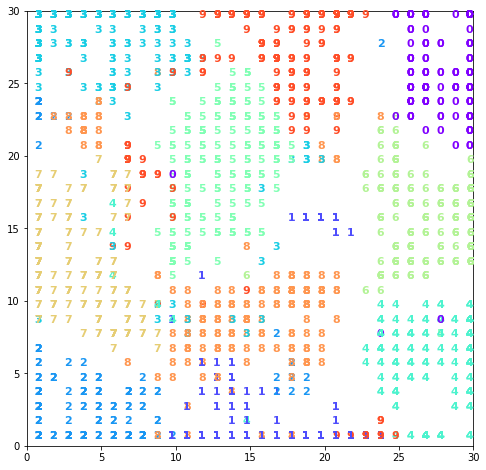

In [132]:
plt.figure(figsize=(8, 8))
wmap = {}
im = 0
for x, t in zip(data, num):
    w = som.winner(x)
    wmap[w] = im
    plt.text(w[0]+0.5, w[1]+0.5, str(t),
            color=plt.cm.rainbow(t/10.), fontdict={'weight': 'bold',
                                                  'size':11})
    im = im + 1
    
plt.axis([0, som.get_weights().shape[0], 0, som.get_weights().shape[1]])
plt.savefig('som_digits.png')
plt.show()

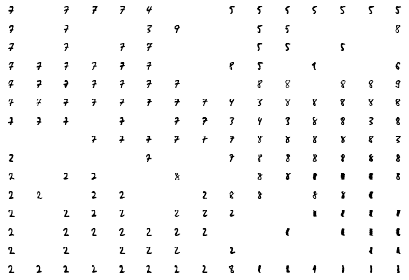

In [133]:
cnt = 0
for j in reversed(range(15)):  # images mosaic
    for i in range(15):
        plt.subplot(15, 15, cnt+1, frameon=False,  xticks=[],  yticks=[])
        if (i, j) in wmap:
            plt.imshow(digits.images[wmap[(i, j)]],
                       cmap='Greys', interpolation='nearest')
        else:
            plt.imshow(np.zeros((8, 8)),  cmap='Greys')
        cnt = cnt + 1

plt.tight_layout()
plt.savefig('som_digts_imgs.png')
plt.show()

# FashionMnist 

In [29]:
fashion = pd.read_csv('fashion-mnist_train.csv')
fashion.shape

(60000, 785)

In [37]:
fashion_labels = fashion['label'].to_numpy()
fashion_data = fashion.iloc[:, 1:].to_numpy()

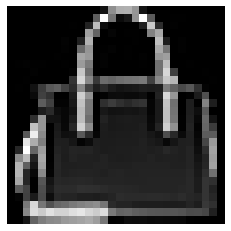

In [120]:
plt.imshow(fashion_data[11].reshape(28, 28), cmap='gray')
plt.axis('off')
plt.show()

In [38]:
fashion_labels.shape, fashion_data.shape

((60000,), (60000, 784))

In [39]:
fashion['label'].nunique()

10

### SOM on Fashion MNIST with `triangle` neighborhood function

In [41]:
som = MiniSom(30, 30, 784, sigma=4, learning_rate=0.5, neighborhood_function='triangle')
som.pca_weights_init(fashion_data)
som.train(fashion_data, 5000, random_order=True, verbose=True)

 [ 5000 / 5000 ] 100% - 0:00:00 left 
 quantization error: 1060.1044665082215


**I used SOM to map the Fashion MNIST data into a 30x30 map with the neighborhood function
set as a `triangle`. This resulted in a quantization error of `1060.104`.**

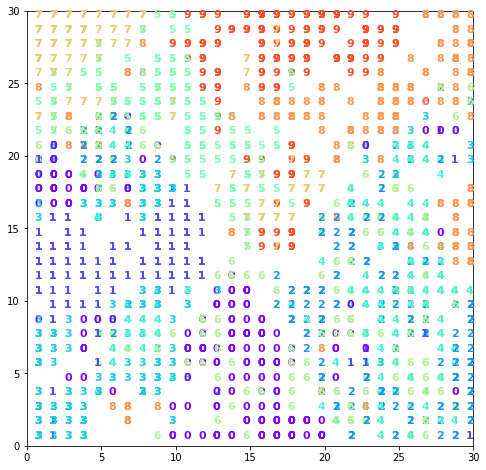

In [42]:
plt.figure(figsize=(8, 8))
wmap = {}
im = 0
for x, t in zip(fashion_data[: 2000], fashion_labels[:2000]):  # scatterplot
    w = som.winner(x)
    wmap[w] = im
    plt. text(w[0]+.5,  w[1]+.5,  str(t),
              color=plt.cm.rainbow(t / 10.), fontdict={'weight': 'bold',  'size': 11})
    im = im + 1
plt.axis([0, som.get_weights().shape[0], 0,  som.get_weights().shape[1]])
plt.savefig('som_fashion.png')
plt.show()

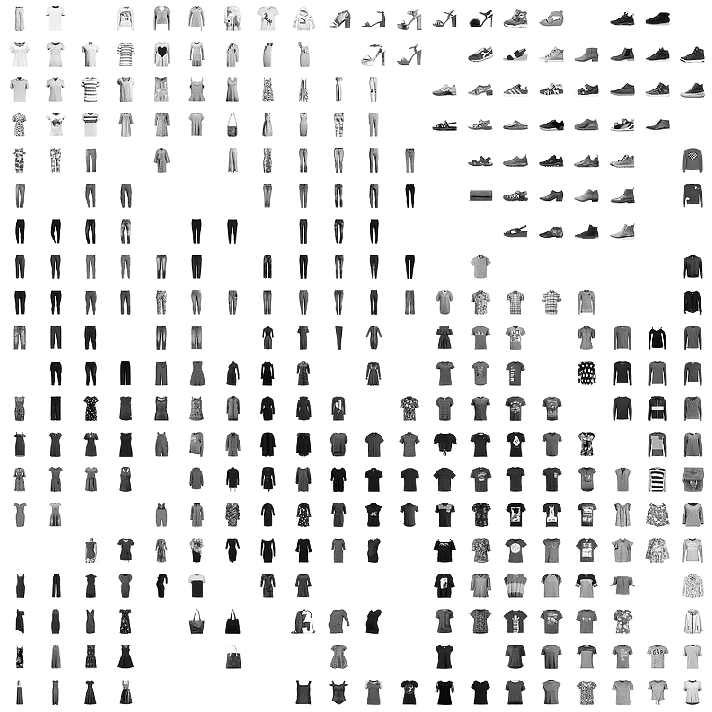

In [43]:
plt.figure(figsize=(10, 10), facecolor='white')
cnt = 0
for j in reversed(range(20)):  # images mosaic
    for i in range(20):
        plt.subplot(20, 20, cnt+1, frameon=False,  xticks=[],  yticks=[])
        if (i, j) in wmap:
            plt.imshow(fashion_data[wmap[(i, j)]].reshape(28, 28),
                       cmap='Greys', interpolation='nearest')
        else:
            plt.imshow(np.zeros((8, 8)),  cmap='Greys')
        cnt = cnt + 1

plt.tight_layout()
plt.savefig('som_fashion_imgs.png')
plt.show()

### SOM on MNIST with `gaussian` neighborhood function

In [51]:
som = MiniSom(30, 30, 784, sigma=4, learning_rate=0.7)
som.pca_weights_init(fashion_data)
som.train(fashion_data, 5000, random_order=True, verbose=True)

 [ 5000 / 5000 ] 100% - 0:00:00 left 
 quantization error: 1201.4116417044586


**I used SOM to map the Fashion MNIST data into a 30x30 map with the neighborhood function
set as a `gaussian`. This resulted in a quantization error of `1201.411`.**

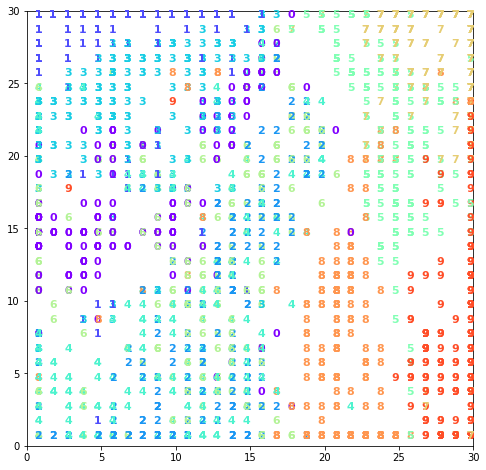

In [52]:
plt.figure(figsize=(8, 8))
wmap = {}
im = 0
for x, t in zip(fashion_data[: 2000], fashion_labels[:2000]):  # scatterplot
    w = som.winner(x)
    wmap[w] = im
    plt. text(w[0]+.5,  w[1]+.5,  str(t),
              color=plt.cm.rainbow(t / 10.), fontdict={'weight': 'bold',  'size': 11})
    im = im + 1
plt.axis([0, som.get_weights().shape[0], 0,  som.get_weights().shape[1]])
plt.savefig('som_fashion.png')
plt.show()

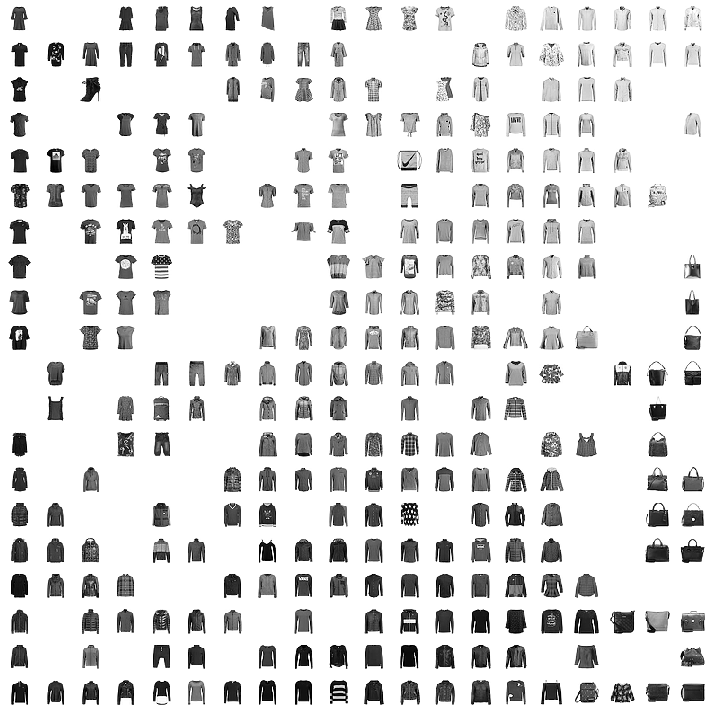

In [53]:
plt.figure(figsize=(10, 10), facecolor='white')
cnt = 0
for j in reversed(range(20)):  # images mosaic
    for i in range(20):
        plt.subplot(20, 20, cnt+1, frameon=False,  xticks=[],  yticks=[])
        if (i, j) in wmap:
            plt.imshow(fashion_data[wmap[(i, j)]].reshape(28, 28),
                       cmap='Greys', interpolation='nearest')
        else:
            plt.imshow(np.zeros((8, 8)),  cmap='Greys')
        cnt = cnt + 1

plt.tight_layout()
plt.savefig('som_fashion_imgs.png')
plt.show()

### SOM conclusion
The `triangle` neighborhood function seems to produce better results with smaller error and better
separation over different datasets.